In [4]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [20]:
x_train[200];

In [24]:
import matplotlib.pyplot as plt

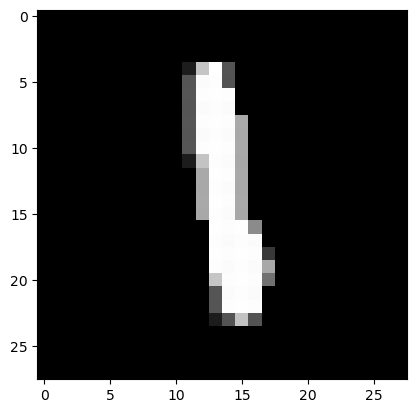

In [28]:
plt.imshow(x_train[200], cmap = 'grey');

In [30]:
y_train[200]

1

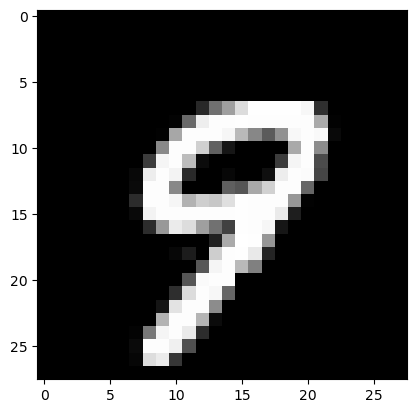

In [32]:
plt.imshow(x_train[2453], cmap = 'grey');

In [34]:
y_train[2453]

9

In [36]:
img = np.array([[0.78, 0.34], [0.20, 0.80]])

In [38]:
img

array([[0.78, 0.34],
       [0.2 , 0.8 ]])

In [42]:
img.shape

(2, 2)

In [46]:
img.flatten()

array([0.78, 0.34, 0.2 , 0.8 ])

In [48]:
x_train[200].shape

(28, 28)

In [52]:
x_train[200].flatten().shape

(784,)

In [58]:
# reshaping
arr = np.array([[1,2,3],[4,5,6],[7,8,9], [10,11,12]])
arr

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [60]:
arr.shape

(4, 3)

In [62]:
arr.reshape(2,6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [64]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [66]:
x_train.shape

(60000, 784)

In [70]:
x_train[200];

In [72]:
x_train = x_train / 255
x_test = x_test / 255

In [74]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

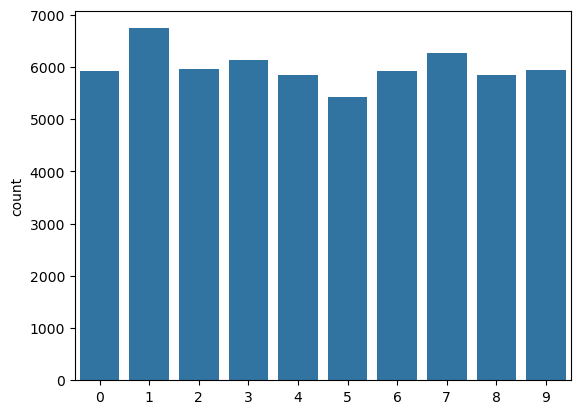

In [76]:
import seaborn as sns
sns.countplot(x = y_train);

In [78]:
# ohe

from keras.utils import to_categorical

y_train_cat= to_categorical(y_train)
y_test_cat = to_categorical(y_test)

#### define the network arcitecture

In [81]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [83]:
model = Sequential()

model.add(Dense(784, activation= 'relu', input_shape= (784,)))

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

/home/aditya/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 818,970 (3.12 MB)

 Trainable params: 818,970 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# compile the model

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'],
             optimizer = SGD(learning_rate= 0.001, momentum = 0.7))

In [89]:
# train the model
history =model.fit(x_train, y_train_cat, epochs = 10, batch_size = 10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.7726 - loss: 0.8875
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9223 - loss: 0.2702
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9384 - loss: 0.2142
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9496 - loss: 0.1824
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9578 - loss: 0.1508
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9637 - loss: 0.1317
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9676 - loss: 0.1177
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9717 - loss: 0.1000
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9748 - loss: 0.0914
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9772 - loss: 0.0865


In [91]:
history.history

{'accuracy': [0.8636333346366882,
  0.9262833595275879,
  0.9418166875839233,
  0.9515500068664551,
  0.9587833285331726,
  0.9642666578292847,
  0.9688500165939331,
  0.9715333580970764,
  0.9750666618347168,
  0.9776666760444641],
 'loss': [0.5290518999099731,
  0.2571106255054474,
  0.20510689914226532,
  0.17125655710697174,
  0.1472230702638626,
  0.12839418649673462,
  0.11358810216188431,
  0.10140857845544815,
  0.09125354886054993,
  0.08227841556072235]}

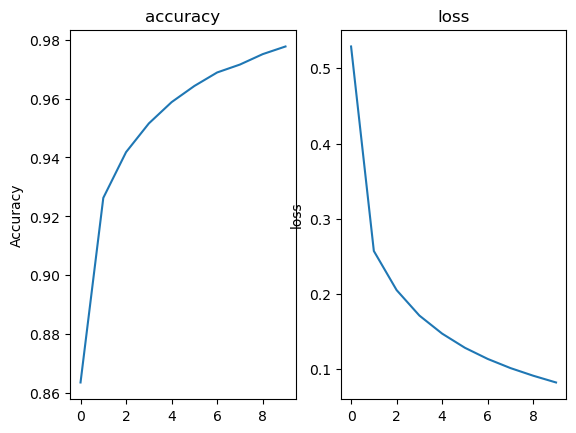

In [101]:
plt.subplot(1,2,1)
plt.title('accuracy')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy']);

plt.subplot(1,2,2)
plt.title('loss')
plt.ylabel('loss')
plt.plot(history.history['loss']);

In [103]:
model.evaluate(x_test, y_test_cat, batch_size = 1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9683 - loss: 0.1130


[0.094760462641716, 0.9732000231742859]